In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000,5.450000
...,...,...,...,...,...,...
2019-12-11,71.438004,70.218002,70.375999,70.540001,34489000,70.540001
2019-12-12,72.547997,70.646004,70.984001,71.935997,38819500,71.935997
2019-12-13,73.042000,70.928001,72.209999,71.678001,32854500,71.678001


In [3]:
df.shape

(2003, 6)

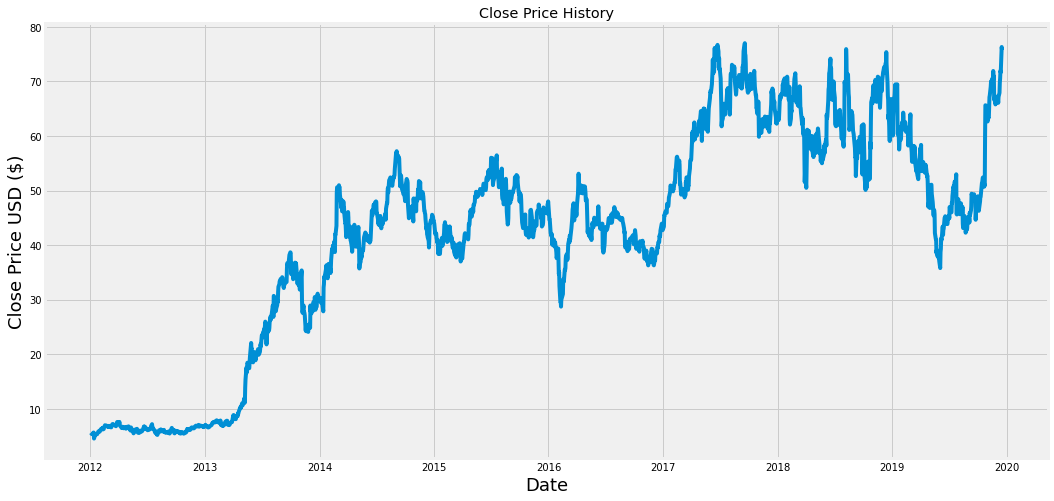

In [4]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1603

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01460479],
       [0.01358328],
       [0.01195439],
       ...,
       [0.92653435],
       [0.99033714],
       [0.98340737]])

In [7]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01460479, 0.01358328, 0.01195439, 0.01137462, 0.0123133 ,
       0.01333481, 0.01501891, 0.01507413, 0.        , 0.01051876,
       0.01109853, 0.01096049, 0.01051876, 0.0109881 , 0.01278264,
       0.01430109, 0.0169791 , 0.01805583, 0.01871842, 0.01733801,
       0.01874603, 0.02059579, 0.02308053, 0.02487507, 0.02432291,
       0.02523398, 0.02702852, 0.02294249, 0.02401921, 0.02865741,
       0.02984456, 0.03144584, 0.0336269 , 0.03232931, 0.03155628,
       0.03241214, 0.03025869, 0.02989978, 0.03042434, 0.02932001,
       0.03208084, 0.03105933, 0.03031391, 0.02849176, 0.02851937,
       0.02838132, 0.03299191, 0.03649816, 0.03671903, 0.03451037,
       0.03370973, 0.03459319, 0.03365451, 0.03359929, 0.03412385,
       0.03205323, 0.03116976, 0.04033572, 0.04182656, 0.04157809])]
[0.04014245873792312]

[array([0.01460479, 0.01358328, 0.01195439, 0.01137462, 0.0123133 ,
       0.01333481, 0.01501891, 0.01507413, 0.        , 0.01051876,
       0.01109853, 0.01096049, 0.01

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

: 

: 

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

In [ ]:
rmse = np.sqrt( np.mean( pred - y_test )**2 )
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = pred
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close', 'Predictions'])
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
valid

In [ ]:
tesla_qoute = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2019-12-11')
new_df = tesla_qoute.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

In [ ]:
tesla_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(tesla_quote2['Close'])